In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import re

This is the extract data for the computed centres. Graphical plots of the results in relation to their relative differences

In [6]:
names = names = ('Image', 'Centre')

fitting_centres = pd.read_csv("Fit_circle_center_05_24.csv", sep=",", names=names)
fitting_centres.head(10)

FileNotFoundError: [Errno 2] No such file or directory: 'Master_thesis\\Data\\Fit_circle_center_05_24.csv'

Generate a column for timestamps

In [3]:
# Extracting x_centre[px] and y_centre[px]
fitting_centres['x_centre[px]'] = fitting_centres['Centre'].apply(lambda x: int(x[1:4]))
fitting_centres['y_centre[px]'] = fitting_centres['Centre'].apply(lambda x: int(x[6:9]))

# Extracting datetime using a regular expression
fitting_centres['datetime'] = fitting_centres['Image'].apply(lambda x: re.search(r'_(\d{4}-\d{2}-\d{2}_\d{2}-\d{2}-\d{2})\.jpg', x).group(1))

fitting_centres


,Image,Centre,x_centre[px],y_centre[px],datetime
0,IMG_252_2024-05-09_19-00-48.jpg,"(183, 177)",183,177,2024-05-09_19-00-48
1,IMG_252_2024-05-09_19-01-56.jpg,"(180, 174)",180,174,2024-05-09_19-01-56
2,IMG_252_2024-05-09_19-03-04.jpg,"(180, 174)",180,174,2024-05-09_19-03-04
3,IMG_252_2024-05-09_19-04-12.jpg,"(182, 179)",182,179,2024-05-09_19-04-12
4,IMG_252_2024-05-09_19-05-20.jpg,"(180, 175)",180,175,2024-05-09_19-05-20
...,...,...,...,...,...
2497,IMG_252_2024-05-11_18-53-14.jpg,"(165, 187)",165,187,2024-05-11_18-53-14
2498,IMG_252_2024-05-11_18-54-40.jpg,"(167, 186)",167,186,2024-05-11_18-54-40
2499,IMG_252_2024-05-11_18-56-06.jpg,"(165, 183)",165,183,2024-05-11_18-56-06
2500,IMG_252_2024-05-11_18-57-30.jpg,"(166, 184)",166,184,2024-05-11_18-57-30


Using the ratio calculated from the modal diameter/radius, generate the centres in mm

In [8]:
# ratio for conversion to millimeters is calculated from the detection script

ratio = 0.45299136

fitting_centres['x_centre[mm]'] = fitting_centres['x_centre[px]']*ratio
fitting_centres['y_centre[mm]'] = fitting_centres['y_centre[px]']*ratio
fitting_centres=fitting_centres[['Image','datetime','x_centre[px]','y_centre[px]','x_centre[mm]','y_centre[mm]']]
fitting_centres.sort_values(by ='Image')


,Image,datetime,x_centre[px],y_centre[px],x_centre[mm],y_centre[mm]
0,IMG_252_2024-05-09_19-00-48.jpg,2024-05-09_19-00-48,183,177,82.897419,80.179471
1,IMG_252_2024-05-09_19-01-56.jpg,2024-05-09_19-01-56,180,174,81.538445,78.820497
2,IMG_252_2024-05-09_19-03-04.jpg,2024-05-09_19-03-04,180,174,81.538445,78.820497
3,IMG_252_2024-05-09_19-04-12.jpg,2024-05-09_19-04-12,182,179,82.444428,81.085453
4,IMG_252_2024-05-09_19-05-20.jpg,2024-05-09_19-05-20,180,175,81.538445,79.273488
...,...,...,...,...,...,...
2497,IMG_252_2024-05-11_18-53-14.jpg,2024-05-11_18-53-14,165,187,74.743574,84.709384
2498,IMG_252_2024-05-11_18-54-40.jpg,2024-05-11_18-54-40,167,186,75.649557,84.256393
2499,IMG_252_2024-05-11_18-56-06.jpg,2024-05-11_18-56-06,165,183,74.743574,82.897419
2500,IMG_252_2024-05-11_18-57-30.jpg,2024-05-11_18-57-30,166,184,75.196566,83.350410


Calculate the relative differences (rel_diff_x[mm], rel_diff_y[mm]) between subsequent centres.

In [10]:
mean_x_centre = fitting_centres['x_centre[mm]'].mean()
print('mean value is: ',mean_x_centre)

mean value is:  93.45037947165467


In [5]:
fitting_centres['rel_diff_x[mm]']=  fitting_centres['x_centre[mm]'].diff()

fitting_centres['rel_diff_y[mm]']=  fitting_centres['y_centre[mm]'].diff()

fitting_centres[['rel_diff_x[mm]','rel_diff_y[mm]']]= fitting_centres[['rel_diff_x[mm]','rel_diff_y[mm]']].fillna(0)

fitting_centres

,Image,datetime,x_centre[px],y_centre[px],x_centre[mm],y_centre[mm],rel_diff_x[mm],rel_diff_y[mm]
0,IMG_252_2024-05-09_19-00-48.jpg,2024-05-09_19-00-48,183,177,82.897419,80.179471,0.000000,0.000000
1,IMG_252_2024-05-09_19-01-56.jpg,2024-05-09_19-01-56,180,174,81.538445,78.820497,-1.358974,-1.358974
2,IMG_252_2024-05-09_19-03-04.jpg,2024-05-09_19-03-04,180,174,81.538445,78.820497,0.000000,0.000000
3,IMG_252_2024-05-09_19-04-12.jpg,2024-05-09_19-04-12,182,179,82.444428,81.085453,0.905983,2.264957
4,IMG_252_2024-05-09_19-05-20.jpg,2024-05-09_19-05-20,180,175,81.538445,79.273488,-0.905983,-1.811965
...,...,...,...,...,...,...,...,...
2497,IMG_252_2024-05-11_18-53-14.jpg,2024-05-11_18-53-14,165,187,74.743574,84.709384,0.000000,1.358974
2498,IMG_252_2024-05-11_18-54-40.jpg,2024-05-11_18-54-40,167,186,75.649557,84.256393,0.905983,-0.452991
2499,IMG_252_2024-05-11_18-56-06.jpg,2024-05-11_18-56-06,165,183,74.743574,82.897419,-0.905983,-1.358974
2500,IMG_252_2024-05-11_18-57-30.jpg,2024-05-11_18-57-30,166,184,75.196566,83.350410,0.452991,0.452991


A plot of the relative movement of the bridge in the x_direction which is parallel to the direction of gravity travel.

c:\Users\kwayi\anaconda3\envs\hs_nb_env\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


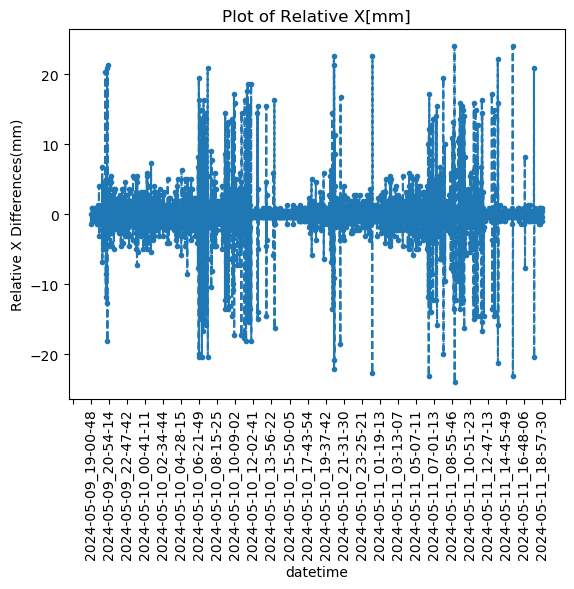

In [6]:
plt.plot(fitting_centres['datetime'], fitting_centres['rel_diff_x[mm]'], '--.')
plt.xlabel('datetime')  # Adding label to x-axis
plt.ylabel('Relative X Differences(mm)')  # Adding label to y-axis
#plt.title('Plot of Relative X vs Relative Y Differences')
plt.title('Plot of Relative X[mm]')
plt.xticks(rotation=90)

ax1 = plt.axes()
x_axis = ax1.axes.get_xaxis()
#x_axis.set_visible(False)
# Save the combined plot as an image
#combined_image_path =  r"C:\Users\kwayi\Desktop\School\MasterArbeite_23.24\Lab_test_data\images\rel_x_diff_1.jpg"  # Specify the path for saving the image
#plt.savefig(combined_image_path)

# Close the plot to release resources
#plt.close()


ax = plt.gca()  # Get current axis
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=100))

plt.show()

A plot of the relative movement of the bridge in the x_direction which is perpendicular to the direction of gravity travel.


c:\Users\kwayi\anaconda3\envs\hs_nb_env\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


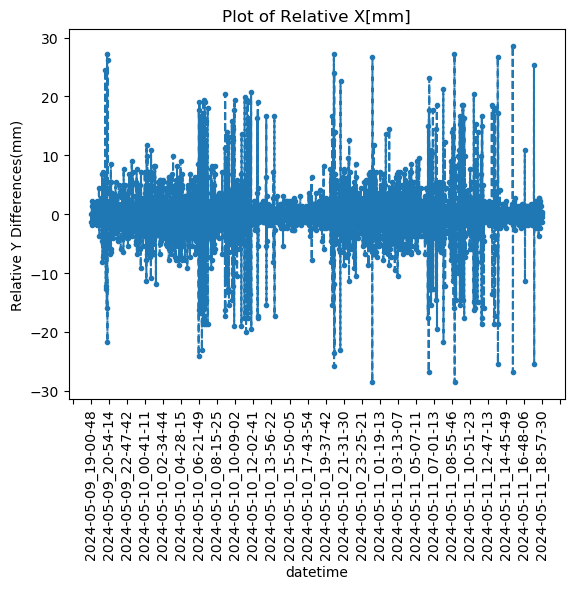

In [7]:
plt.plot(fitting_centres['datetime'], fitting_centres['rel_diff_y[mm]'], '--.')
plt.xlabel('datetime')  # Adding label to x-axis
plt.ylabel('Relative Y Differences(mm)')  # Adding label to y-axis
#plt.title('Plot of Relative X vs Relative Y Differences')
plt.title('Plot of Relative X[mm]')
plt.xticks(rotation=90)

ax1 = plt.axes()
x_axis = ax1.axes.get_xaxis()
#x_axis.set_visible(False)
# Save the combined plot as an image
#combined_image_path =  r"C:\Users\kwayi\Desktop\School\MasterArbeite_23.24\Lab_test_data\images\rel_x_diff_1.jpg"  # Specify the path for saving the image
#plt.savefig(combined_image_path)

# Close the plot to release resources
#plt.close()


ax = plt.gca()  # Get current axis
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=100))

plt.show()

Finding the standard deviation and standard error for the relative differences

In [8]:
#Compute the standard deviation
standard_deviation_x = np.std(fitting_centres['rel_diff_x[mm]'])
standard_deviation_y = np.std(fitting_centres['rel_diff_y[mm]'])

# Compute the standard error
standard_error_y = fitting_centres['rel_diff_y[mm]'].sem()
standard_error_x = fitting_centres['rel_diff_x[mm]'].sem()


print("Standard deviation for Relative X Differences (mm):", standard_deviation_x)
print("Standard deviation for Relative Y Differences (mm):", standard_deviation_y)
print("Standard Error for Relative X Differences (mm):", standard_error_x)
print("Standard Error for Relative X Differences (mm):", standard_error_y)

Standard deviation for Relative X Differences (mm): 4.421876005610591
Standard deviation for Relative Y Differences (mm): 5.504541510535449
Standard Error for Relative X Differences (mm): 0.08841983791267244
Standard Error for Relative X Differences (mm): 0.11006881864791561


Not excluding any outliers, 

standard deviation in  x is 3.166(mm2)

standard error in y is 0.353mm

standard deviation in  y is 8.543(mm2)

standsard error in y is 0.955mm




In [9]:
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
#fitting_centres

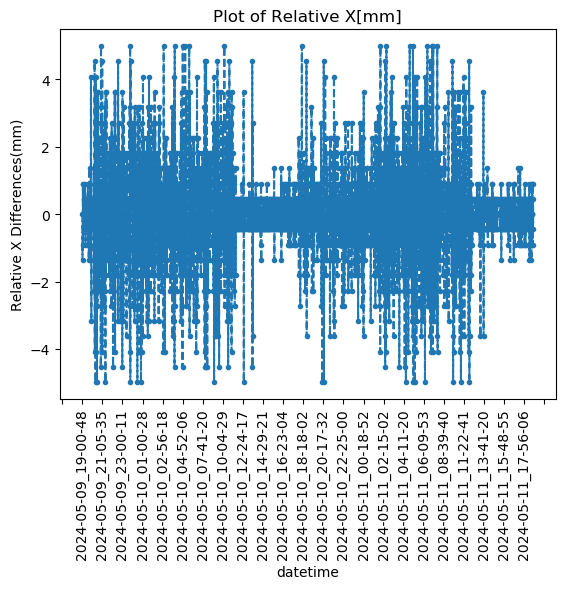

In [10]:
# Conditional masking to filter out values greater than +5 or less than -5
mask_x = (fitting_centres['rel_diff_x[mm]'] < 5) & (fitting_centres['rel_diff_x[mm]'] > -5)
datetime = fitting_centres['datetime'][mask_x]
rel_diff_x = fitting_centres['rel_diff_x[mm]'][mask_x]

plt.plot(datetime, rel_diff_x, '--.')
plt.xlabel('datetime')  # Adding label to x-axis
plt.ylabel('Relative X Differences(mm)')  # Adding label to y-axis
plt.title('Plot of Relative X[mm]')
plt.xticks(rotation=90)

ax1 = plt.gca()
x_axis = ax1.xaxis

# Adjusting the x-axis locator
ax = plt.gca()  # Get current axis
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=100))  # Adjust base to 10 for wider range

plt.show()



In [15]:
mask_x = (fitting_centres['rel_diff_x[mm]'] < 7) & (fitting_centres['rel_diff_x[mm]'] > -7)
mask_x.describe()

count     2502
unique       2
top       True
freq      2307
Name: rel_diff_x[mm], dtype: object

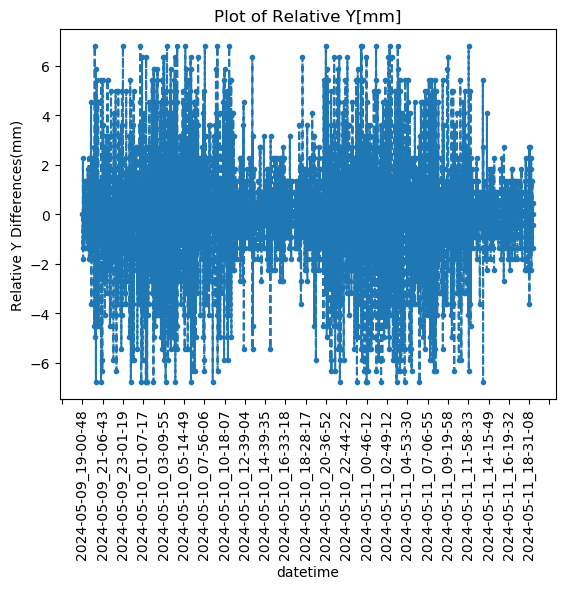

In [16]:
# Conditional masking to filter out values greater than +6 or less than -6
mask_y = (fitting_centres['rel_diff_y[mm]'] < 7) & (fitting_centres['rel_diff_y[mm]'] > -7)
datetime = fitting_centres['datetime'][mask_y]
rel_diff_y = fitting_centres['rel_diff_y[mm]'][mask_y]

plt.plot(datetime, rel_diff_y, '--.')
plt.xlabel('datetime')  # Adding label to x-axis
plt.ylabel('Relative Y Differences(mm)')  # Adding label to y-axis
plt.title('Plot of Relative Y[mm]')
plt.xticks(rotation=90)

ax1 = plt.gca()
y_axis = ax1.xaxis

# Adjusting the x-axis locator
ax = plt.gca()  # Get current axis
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=100))  # Adjust base to 10 for wider range

plt.show()



In [17]:
mask_y.describe()

count     2502
unique       2
top       True
freq      2221
Name: rel_diff_y[mm], dtype: object

In [18]:
standard_deviation_x1 = np.std(mask_x)
standard_deviation_y1 = np.std(mask_y)

# Compute the standard error
standard_error_y1 = fitting_centres['rel_diff_y[mm]'].sem()
standard_error_x1 = fitting_centres['rel_diff_x[mm]'].sem()

print("Standard deviation for Relative X Differences (mm):", standard_deviation_x1)
print("Standard deviation for Relative Y Differences (mm):", standard_deviation_y1)
print("Standard Error for Relative X Differences (mm):", standard_error_y1)
print("Standard Error for Relative Y Differences (mm):", standard_error_x1)


Standard deviation for Relative X Differences (mm): 0.2680734463001949
Standard deviation for Relative Y Differences (mm): 0.31574765504042324
Standard Error for Relative X Differences (mm): 0.11006881864791561
Standard Error for Relative Y Differences (mm): 0.08841983791267244
